In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import csv
import pandas as pd
import numpy as np

# Logistic Regression
### Data Pre-Processing

In [2]:
df = pd.read_csv("school_shooting_merge.csv")

print(df.columns)
print(len(df))
df.head()
len(df)

Index(['gsId', 'name', 'old name', 'matching', 'shoot', 'type',
       'gradeCategory', 'gradeRange', 'enrollment', 'parentRating', 'gsRating',
       'district', 'districtId', 'districtNCESId', 'ncesId', 'address', 'city',
       'gsID_census', 'Asian', 'Black, non-Hispanic', 'Hispanic',
       'Multiracial', 'Native American or Native Alaskan',
       'Native Hawaiian or Other Pacific Islander', 'White, non-Hispanic',
       'actSatNumberParticipation', 'apCourseParticipation', 'apCoursePassed',
       'freeAndReducedPriceLunch', 'idea', 'percentTeachersInFirstSecondYear',
       'plan504'],
      dtype='object')
15750


15750

In [3]:
df_select=df[['type','gradeCategory','enrollment','parentRating','gsRating','districtId',
             'Asian', 'Black, non-Hispanic', 'Hispanic','Multiracial', 'Native American or Native Alaskan',
            'Native Hawaiian or Other Pacific Islander', 'White, non-Hispanic',
            'actSatNumberParticipation', 'apCourseParticipation', 'apCoursePassed',
       'freeAndReducedPriceLunch', 'idea', 'percentTeachersInFirstSecondYear','plan504','shoot']]

df_dropna = df_select.dropna()

print(df_dropna.dtypes)

print(len(df_dropna))

df_dropna.head()

type                                          object
gradeCategory                                 object
enrollment                                     int64
parentRating                                   int64
gsRating                                       int64
districtId                                     int64
Asian                                        float64
Black, non-Hispanic                          float64
Hispanic                                     float64
Multiracial                                  float64
Native American or Native Alaskan            float64
Native Hawaiian or Other Pacific Islander    float64
White, non-Hispanic                          float64
actSatNumberParticipation                    float64
apCourseParticipation                        float64
apCoursePassed                               float64
freeAndReducedPriceLunch                     float64
idea                                         float64
percentTeachersInFirstSecondYear             f

,type,gradeCategory,enrollment,parentRating,gsRating,districtId,Asian,"Black, non-Hispanic",Hispanic,Multiracial,...,Native Hawaiian or Other Pacific Islander,"White, non-Hispanic",actSatNumberParticipation,apCourseParticipation,apCoursePassed,freeAndReducedPriceLunch,idea,percentTeachersInFirstSecondYear,plan504,shoot
0,public,9-12,1853,4,9,1,45.63,6.52,11.87,3.96,...,0.76,31.08,1071.0,46.8,885.0,18.16,8.8,7.9,1.5,0
1,public,K-8,591,5,9,1,39.42,3.05,13.03,16.07,...,0.51,27.92,1071.0,46.8,885.0,6.26,10.1,4.2,0.0,0
2,public,K-5,622,5,9,1,39.23,3.70,14.31,16.24,...,0.16,26.21,1071.0,46.8,885.0,7.40,8.5,11.1,1.7,0
3,public,K-5,478,4,9,1,14.23,1.88,13.39,12.97,...,0.00,57.11,1071.0,46.8,885.0,11.30,8.4,0.0,0.0,0
4,public,6-12,1336,4,6,1,35.63,17.51,16.69,6.66,...,1.42,21.78,178.0,46.8,885.0,40.34,10.9,1.8,2.0,0


In [4]:
df_dropna['gradeCategory'].value_counts()

K-5     5047
9-12    1824
K-8     1413
6-8     1289
K-12    1242
6-12     413
K        117
PK         1
Name: gradeCategory, dtype: int64

In [5]:
df_dummies=pd.get_dummies(data=df_dropna,columns=['type','gradeCategory'])
print(df_dummies.columns)
# print(df_dummies.describe())
# print(df_dummies.head())
df_dummies.shape

Index(['enrollment', 'parentRating', 'gsRating', 'districtId', 'Asian',
       'Black, non-Hispanic', 'Hispanic', 'Multiracial',
       'Native American or Native Alaskan',
       'Native Hawaiian or Other Pacific Islander', 'White, non-Hispanic',
       'actSatNumberParticipation', 'apCourseParticipation', 'apCoursePassed',
       'freeAndReducedPriceLunch', 'idea', 'percentTeachersInFirstSecondYear',
       'plan504', 'shoot', 'type_charter', 'type_private', 'type_public',
       'gradeCategory_6-12', 'gradeCategory_6-8', 'gradeCategory_9-12',
       'gradeCategory_K', 'gradeCategory_K-12', 'gradeCategory_K-5',
       'gradeCategory_K-8', 'gradeCategory_PK'],
      dtype='object')


(11346, 30)

In [6]:
df_dummies.shoot.value_counts()

0    11271
1       75
Name: shoot, dtype: int64

In [11]:
# Assign X (data) and y (target)

X = df_dummies.drop(columns=['shoot'])
print(X.shape)
X.head()

(11346, 29)


,enrollment,parentRating,gsRating,districtId,Asian,"Black, non-Hispanic",Hispanic,Multiracial,Native American or Native Alaskan,Native Hawaiian or Other Pacific Islander,...,type_private,type_public,gradeCategory_6-12,gradeCategory_6-8,gradeCategory_9-12,gradeCategory_K,gradeCategory_K-12,gradeCategory_K-5,gradeCategory_K-8,gradeCategory_PK
0,1853,4,9,1,45.63,6.52,11.87,3.96,0.17,0.76,...,0,1,0,0,1,0,0,0,0,0
1,591,5,9,1,39.42,3.05,13.03,16.07,0.00,0.51,...,0,1,0,0,0,0,0,0,1,0
2,622,5,9,1,39.23,3.70,14.31,16.24,0.16,0.16,...,0,1,0,0,0,0,0,1,0,0
3,478,4,9,1,14.23,1.88,13.39,12.97,0.42,0.00,...,0,1,0,0,0,0,0,1,0,0
4,1336,4,6,1,35.63,17.51,16.69,6.66,0.30,1.42,...,0,1,1,0,0,0,0,0,0,0


In [12]:
# YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY
y = df_dummies.shoot
y.shape

(11346,)

In [13]:
# Split the data using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y) # split to keep ratio of y value

In [22]:
y_train.value_counts()

0    8453
1      56
Name: shoot, dtype: int64

In [14]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Fit the model to the data
classifier.fit(X_train, y_train)

C:\Users\soyou\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# Validate the model using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9934187331061229
Testing Data Score: 0.9933027846316531


In [17]:
# Make predictions using the X_test and y_test data
# Print at least 10 predictions vs their actual labels
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")
preds=pd.DataFrame({"Prediction": predictions, "Actual": y_test})
                    # use .reset_index(drop=True) to drop index
preds.head()

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


,Prediction,Actual
4526,0,0
4127,0,0
3046,0,0
6860,0,0
13683,0,0


In [19]:
from sklearn.metrics import classification_report
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=["no shoot", "shoot"]))

              precision    recall  f1-score   support

    no shoot       0.99      1.00      1.00      2818
       shoot       0.00      0.00      0.00        19

    accuracy                           0.99      2837
   macro avg       0.50      0.50      0.50      2837
weighted avg       0.99      0.99      0.99      2837



C:\Users\soyou\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# .to_csv('.csv',index=False)

# Decision Tree

In [67]:
from sklearn import tree
target = df_dummies['shoot']
target_names = ['no shoot','shoot']

data = df_dummies.drop(columns=['shoot'])
feature_names= data.columns

# Create a Decision Tree Classifier
clf_traintest = tree.DecisionTreeClassifier() # clf - classifier
# Fit the classifier to the data
clf_traintest = clf_traintest.fit(X_train, y_train)

# score
clf_traintest.score(X_test,y_test)

0.986958054282693

In [68]:
# for visualization I used the whole dataset
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, target)

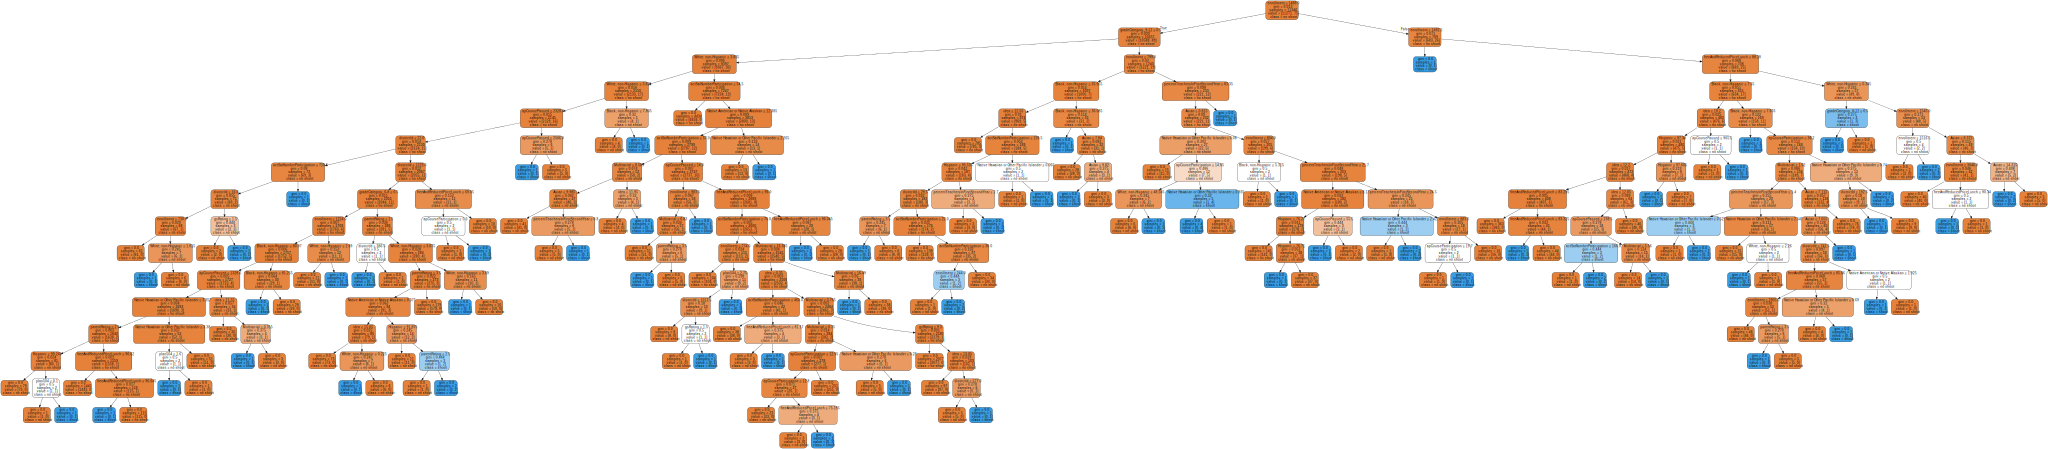

In [69]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')

graph = graphviz.Source(dot_data)  
graph 

# Random Forrest

In [70]:
# Create, fit, and score a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # more number of estimators, possibility of overfitting
rf = rf.fit(X_train, y_train)

In [71]:
rf.score(X_test, y_test)

0.9933027846316531

In [72]:
importances = rf.feature_importances_
importances

array([0.08954906, 0.02078895, 0.02716589, 0.05356049, 0.0617689 ,
       0.0706192 , 0.06790862, 0.05433701, 0.04996209, 0.05327304,
       0.07150949, 0.04806524, 0.04462902, 0.06126369, 0.06855291,
       0.0580667 , 0.03648248, 0.02924949, 0.00117902, 0.00041178,
       0.00413521, 0.00030229, 0.00485925, 0.0154344 , 0.        ,
       0.00021713, 0.00566388, 0.00104478, 0.        ])

In [73]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.08954906430267018, 'enrollment'),
 (0.07150949275042881, 'White, non-Hispanic'),
 (0.07061919742115508, 'Black, non-Hispanic'),
 (0.06855290597973557, 'freeAndReducedPriceLunch'),
 (0.06790861809822911, 'Hispanic'),
 (0.06176889896016908, 'Asian'),
 (0.06126368694060889, 'apCoursePassed'),
 (0.058066703874407766, 'idea'),
 (0.0543370059464964, 'Multiracial'),
 (0.05356048520426813, 'districtId'),
 (0.05327304015660692, 'Native Hawaiian or Other Pacific Islander'),
 (0.04996209358653554, 'Native American or Native Alaskan'),
 (0.04806524402180583, 'actSatNumberParticipation'),
 (0.04462901591764295, 'apCourseParticipation'),
 (0.03648247887842708, 'percentTeachersInFirstSecondYear'),
 (0.02924948515392957, 'plan504'),
 (0.027165893530114484, 'gsRating'),
 (0.020788947705440427, 'parentRating'),
 (0.01543439900066606, 'gradeCategory_9-12'),
 (0.005663884013722361, 'gradeCategory_K-5'),
 (0.004859248462485427, 'gradeCategory_6-8'),
 (0.004135211754815062, 'type_public'),
 (0.001179016

# KNN
requires distant function to change dummy values..I won't go for this.

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# SVM

In [75]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [77]:
# Print the model score using the test data
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.993


In [98]:
from sklearn.svm import SVC
weighted_clf = SVC(kernel='linear', class_weight={0: 10})
weighted_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight={0: 10}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [78]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=["no shoot", "shoot"]))

              precision    recall  f1-score   support

    no shoot       0.99      1.00      1.00      2818
       shoot       0.00      0.00      0.00        19

   micro avg       0.99      0.99      0.99      2837
   macro avg       0.50      0.50      0.50      2837
weighted avg       0.99      0.99      0.99      2837



C:\Users\soyou\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [99]:
# for weighted model

predictions = weighted_clf.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=["no shoot", "shoot"]))

              precision    recall  f1-score   support

    no shoot       0.99      1.00      1.00      2818
       shoot       0.00      0.00      0.00        19

   micro avg       0.99      0.99      0.99      2837
   macro avg       0.50      0.50      0.50      2837
weighted avg       0.99      0.99      0.99      2837



C:\Users\soyou\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Deep Learning

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

didn't scale because of dummy variables

In [79]:
# # Encode for y
# # Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train)
# encoded_y_train = label_encoder.transform(y_train)
# encoded_y_test = label_encoder.transform(y_test)

In [88]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [81]:
# Create an empty sequential model
deepmodel = Sequential()

In [83]:
# Add the first layer where the input dimensions are the columns of the training data
deepmodel.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

In [85]:
# Add a second hidden layer
deepmodel.add(Dense(100, activation='relu'))

In [89]:
# The output layer has 2 columns that are one-hot encoded
y_train_categorical.shape

(8509, 2)

In [90]:
# Add output layer
deepmodel.add(Dense(y_train_categorical.shape[1], activation="softmax"))

In [91]:
# Compile the model using categorical_crossentropy for the loss function, the adam optimizer,
# and add accuracy to the training metrics
deepmodel.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [101]:
deepmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 23,402
Trainable params: 23,402
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Use the training data to fit (train) the model
deepmodel.fit(
    X_train,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

W0730 21:52:07.485193 12276 deprecation.py:323] From C:\Users\soyou\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8509 samples
Epoch 1/100
8509/8509 - 2s - loss: 0.1352 - accuracy: 0.9910
Epoch 2/100
8509/8509 - 1s - loss: 0.1061 - accuracy: 0.9934
Epoch 3/100
8509/8509 - 1s - loss: 0.1061 - accuracy: 0.9934
Epoch 4/100
8509/8509 - 1s - loss: 0.1061 - accuracy: 0.9934
Epoch 5/100
8509/8509 - 1s - loss: 0.1061 - accuracy: 0.9934
Epoch 6/100
8509/8509 - 1s - loss: 0.1061 - accuracy: 0.9934
Epoch 7/100
8509/8509 - 1s - loss: 0.1061 - accuracy: 0.9934
Epoch 8/100
8509/8509 - 1s - loss: 0.1061 - accuracy: 0.9934
Epoch 9/100
8509/8509 - 1s - loss: 0.1061 - accuracy: 0.9934
Epoch 10/100
8509/8509 - 1s - loss: 0.1061 - accuracy: 0.9934
Epoch 11/100
8509/8509 - 1s - loss: 0.1061 - accuracy: 0.9934
Epoch 12/100
8509/8509 - 1s - loss: 0.1061 - accuracy: 0.9934
Epoch 13/100
8509/8509 - 1s - loss: 0.1061 - accuracy: 0.9934
Epoch 14/100
8509/8509 - 1s - loss: 0.1061 - accuracy: 0.9934
Epoch 15/100
8509/8509 - 1s - loss: 0.1061 - accuracy: 0.9934
Epoch 16/100
8509/8509 - 1s - loss: 0.1061 - accuracy: 0.

In [96]:
# Evaluate the model using the testing data
model_loss, model_accuracy = deepmodel.evaluate(X_test, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2837/2837 - 0s - loss: 0.1079 - accuracy: 0.9933
Loss: 0.10794646264299104, Accuracy: 0.9933027625083923


[[1853]
 [ 591]
 [ 622]
 ...
 [ 747]
 [ 230]
 [ 230]]


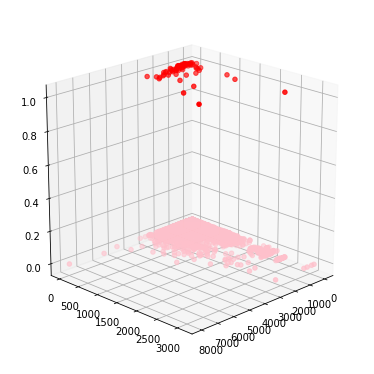

In [115]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
y_reshaped=df_dummies.shoot.values.reshape(-1,1)
# print(y_reshaped)
X_0 = df_dummies.enrollment.values.reshape(-1,1)
print(X_0)
X_1 = df_dummies.apCoursePassed.values.reshape(-1,1)

col = np.where(y==0, 'pink', 'red')
axes.scatter(X_0, X_1, y_reshaped, c=col, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

# Resampling

In [130]:
# Resample to produce more classes from the minority

from sklearn.utils import resample
# concatenate our training data back together
Train_concat = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
no_shoot = Train_concat[Train_concat.shoot==0]
shoot = Train_concat[Train_concat.shoot==1]

# upsample minority
shoot_upsampled = resample(shoot,
                          replace=True, # sample with replacement
                          n_samples=len(no_shoot), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([no_shoot, shoot_upsampled])

# check new class counts
upsampled.shoot.value_counts()

1    8453
0    8453
Name: shoot, dtype: int64

In [131]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.shoot
X_train = upsampled.drop('shoot', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

# Checking accuracy
print(classification_report(y_test, upsampled_pred,
                            target_names=["no shoot", "shoot"]))

              precision    recall  f1-score   support

    no shoot       1.00      0.77      0.87      2818
       shoot       0.02      0.68      0.04        19

   micro avg       0.77      0.77      0.77      2837
   macro avg       0.51      0.73      0.45      2837
weighted avg       0.99      0.77      0.86      2837



In [132]:
# downsample minority
no_shoot_downsampled = resample(no_shoot,
                          replace=False, # sample w/o replacement
                          n_samples=len(shoot), # match minority n
                          random_state=27) # reproducible results

# combine majority and upsampled minority
downsampled = pd.concat([no_shoot_downsampled, shoot])

# check new class counts
downsampled.shoot.value_counts()

1    56
0    56
Name: shoot, dtype: int64

In [133]:
# trying logistic regression again with the balanced dataset
y_train = downsampled.shoot
X_train = downsampled.drop('shoot', axis=1)

downsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

downsampled_pred = downsampled.predict(X_test)

# Checking accuracy
print(classification_report(y_test, downsampled_pred,
                            target_names=["no shoot", "shoot"]))

              precision    recall  f1-score   support

    no shoot       1.00      0.70      0.82      2818
       shoot       0.02      0.84      0.04        19

   micro avg       0.70      0.70      0.70      2837
   macro avg       0.51      0.77      0.43      2837
weighted avg       0.99      0.70      0.82      2837



In [ ]:
from imblearn.over_sampling import SMOTE
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)